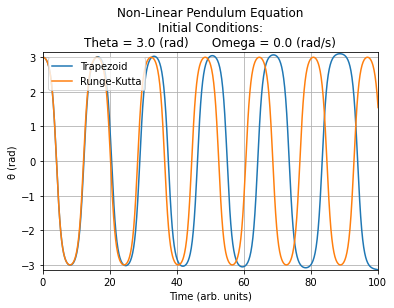

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Parameters for the pendulum problem
k, A = 0.0, 0.0
g, L = 1.0, 1.0
fi = 0.66667

#A function of the Non-Linear Pendulum formula 
def nonlinear_f(theta, omega, time):
    "This is for the non-linear pendulum case. Note that k and A are set to 0, so only the first term is relevant."
    force = (-g/L) * math.sin(theta) - k * omega + A*math.cos(fi*time)  #damping and driven force
    return force

#setting initial conditions
theta = 3.0
omega = 0
t = 0.0
dt = 0.1

#lists that will store the measured theta values and the time
list_trapezoid_theta = [theta]
list_omega = [omega]
list_time = [t]
list_runge_theta = [theta]

#trapezoid method
for _ in range(1,10000):
    k1a = dt * omega
    k1b = dt * nonlinear_f(theta, omega, t)
    k2a = dt * (omega + k1b)
    k2b = dt * nonlinear_f(theta + k1a, omega + k1b, t + dt)
    theta = theta + (k1a + k2a)/2
    omega = omega + (k1b + k2b)/2

    t = t + dt #evolve time step

    #adding calculated theta, omega and t values to their respective lists
    list_trapezoid_theta.append(theta) 
    list_omega.append(omega)
    list_time.append(t)

#resetting initial conditions
theta = 3.0
omega = 0.0
t = 0.0

#Runge-Kutta Algorithm
for _ in range(1,10000):
    k1a = dt * omega
    k1b = dt * nonlinear_f(theta, omega, t)
    k2a = dt * (omega + k1b/2)
    k2b = dt * nonlinear_f(theta + k1a/2, omega + k1b/2, t + dt/2)
    k3a = dt * (omega + k2b/2)
    k3b = dt * nonlinear_f(theta + k2a/2, omega + k2b/2, t + dt/2)
    k4a = dt * (omega + k3b)
    k4b = dt * nonlinear_f(theta + k3a, omega + k3b, t + dt)
    theta = theta + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
    omega = omega + (k1b + 2 * k2b + 2 * k3b + k4b) / 6
    
    #adding the calculated theta value to the runge list
    list_runge_theta.append(theta)

#plotting instructions for non-linear graph
plt.figure()
plt.plot(list_time, list_trapezoid_theta) #plots nonlinear theta plot from trapezoid method
plt.plot(list_time, list_runge_theta) #plots nonlinear theta plot from runge-kutta method
plt.xlim(0,100) #sets x-axis from [0,100]
plt.ylim(-math.pi,math.pi) #sets y-axis from [-pi,pi]
plt.title("Non-Linear Pendulum Equation\nInitial Conditions:\nTheta = %0.1f (rad)      Omega = %0.1f (rad/s)"%(list_trapezoid_theta[0],list_omega[0]) )
plt.xlabel('Time (arb. units)')
plt.ylabel('θ (rad)')
plt.legend(['Trapezoid','Runge-Kutta'], loc = 'upper left')
plt.grid(True)